In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [30]:
# --
idxs = np.load('../data/test/ys_base.npz')['idxs'].item()
ys_base = np.load('../data/test/ys_base.npz')['ys_base']
ys = np.load('../data/test/ys.npz')['ys']

rates_base = ys_base[:, idxs['R']]
rates = ys[:, idxs['R']]

run_pars = np.load('../data/test/run_pars.npz')

times = run_pars['times']
tmax = run_pars['tmax']
stim = run_pars['stim']

pars = np.load('../data/test/pars.npz')

pops = pars['pops']
conns = pars['conns']
codes = pars['codes'].item()

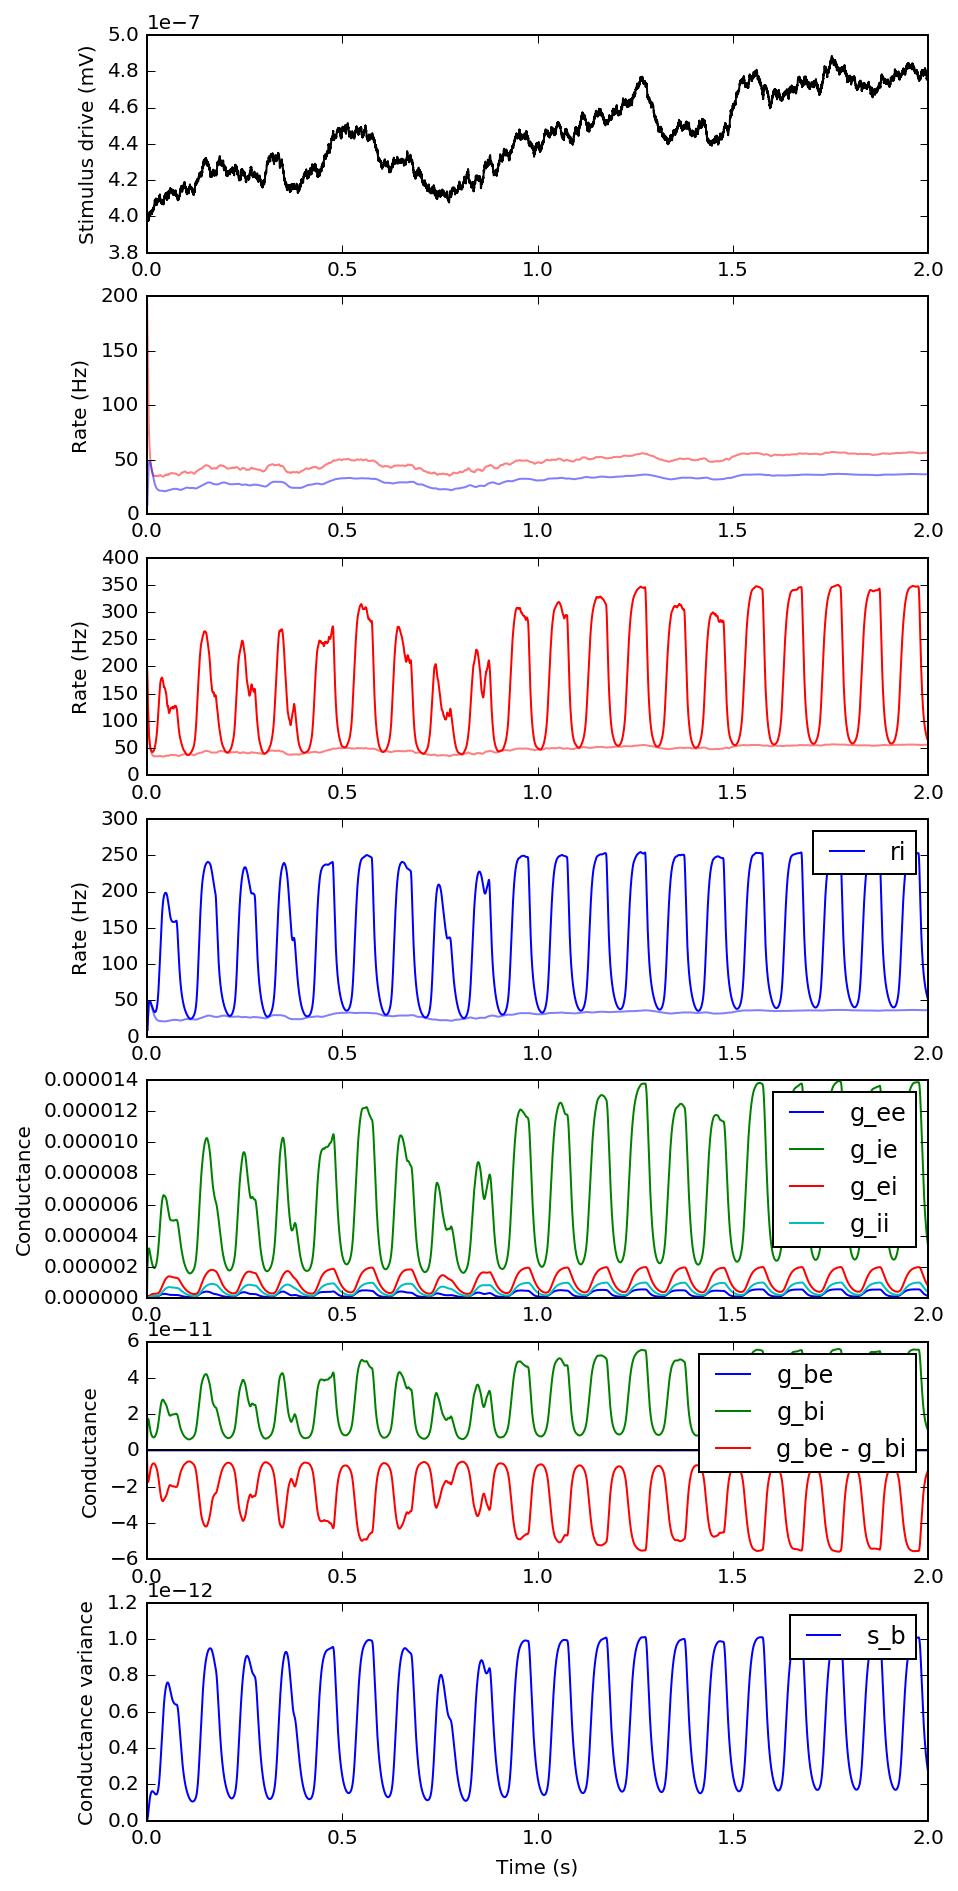

In [31]:
# --
plt.figure(figsize=(7, 16))
nplot = 7

n = 1
plt.subplot(nplot, 1, n)
# stim = np.mean(ys[:, 1]) * np.asarray([Istim(t) for t in times])
plt.plot(times, stim, label='Stimulus', color='k')
plt.ylabel("Stimulus drive (mV)")

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
plt.plot(times, ys_base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 0], color='red')
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 1], label='ri', color='blue')
plt.plot(times, ys_base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 2], label='g_ee')
plt.plot(times, ys[:, 3], label='g_ie')
plt.plot(times, ys[:, 4], label='g_ei')
plt.plot(times, ys[:, 5], label='g_ii')
plt.xlim(0, tmax)
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 6], label='g_be')
plt.plot(times, ys[:, 7], label='g_bi')
plt.plot(times, ys[:, 6] - ys[:, 7], label='g_be - g_bi')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
Sb = ys[:, 8] + ys[:, 9]
plt.plot(times, Sb, label='s_b')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance variance")
plt.legend()

plt.xlabel("Time (s)")